In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from itertools import product

In [2]:
train = pd.read_csv('data/scenario_2/train.csv')
test = pd.read_csv('data/scenario_2/test.csv')

In [3]:
test = test.set_index(keys='Date')


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


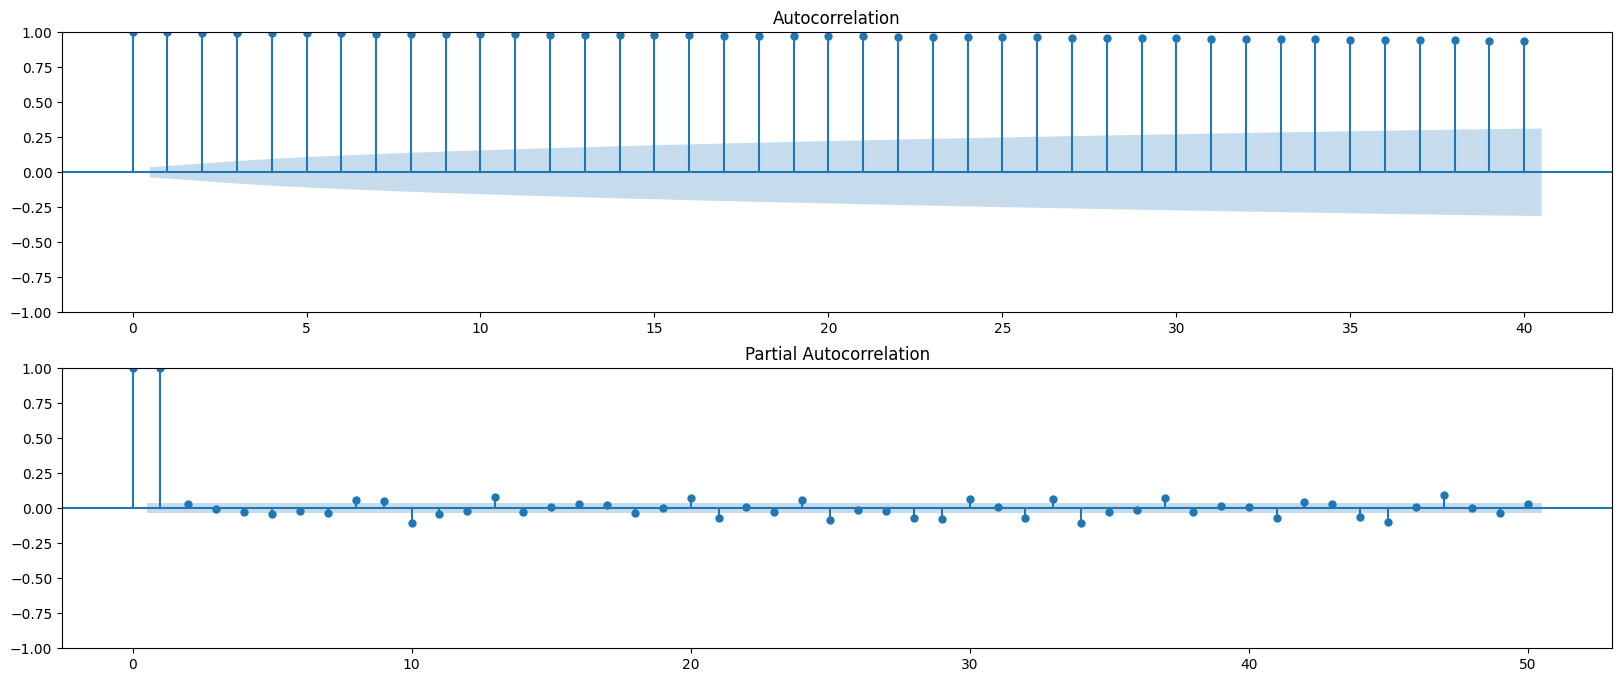

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(20,8))
pyplot.subplot(211)
plot_acf(train['price'], ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(train['price'], ax=pyplot.gca(), lags=50)
pyplot.show()

In [5]:

training_data = list(train['price'])
#testing = testing.append(ts)
#testing_data = list(testing)
testing_data = list(test['price'])

In [6]:
model_predictions = []
n_test_obser = len(testing_data)

In [7]:
# Initial approximation of parameters
Qs = [4,7,9]
qs = [4,7,9]
d=[1]
parameters = product(Qs,d, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
for param in parameters_list:
    try:
        model=ARIMA(training_data, order=(param[0], param[1], param[2]),enforce_stationarity=False,
                                            enforce_invertibility=False).fit()
    except ValueError:
        #print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model 
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ADMIN\AppData\Local\Packages

In [8]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

  parameters           aic
8  (9, 1, 9)  47411.149725
5  (7, 1, 9)  47411.816744
7  (9, 1, 7)  47425.824602
4  (7, 1, 7)  47437.922772
2  (4, 1, 9)  47442.459032
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2938
Model:                 ARIMA(9, 1, 9)   Log Likelihood              -23686.575
Date:                Sat, 10 Dec 2022   AIC                          47411.150
Time:                        09:49:39   BIC                          47524.803
Sample:                             0   HQIC                         47452.082
                               - 2938                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2663      0.335      0.796     

In [9]:
output = best_model.forecast(steps=7)
model_predictions = output
actual_test_value = testing_data


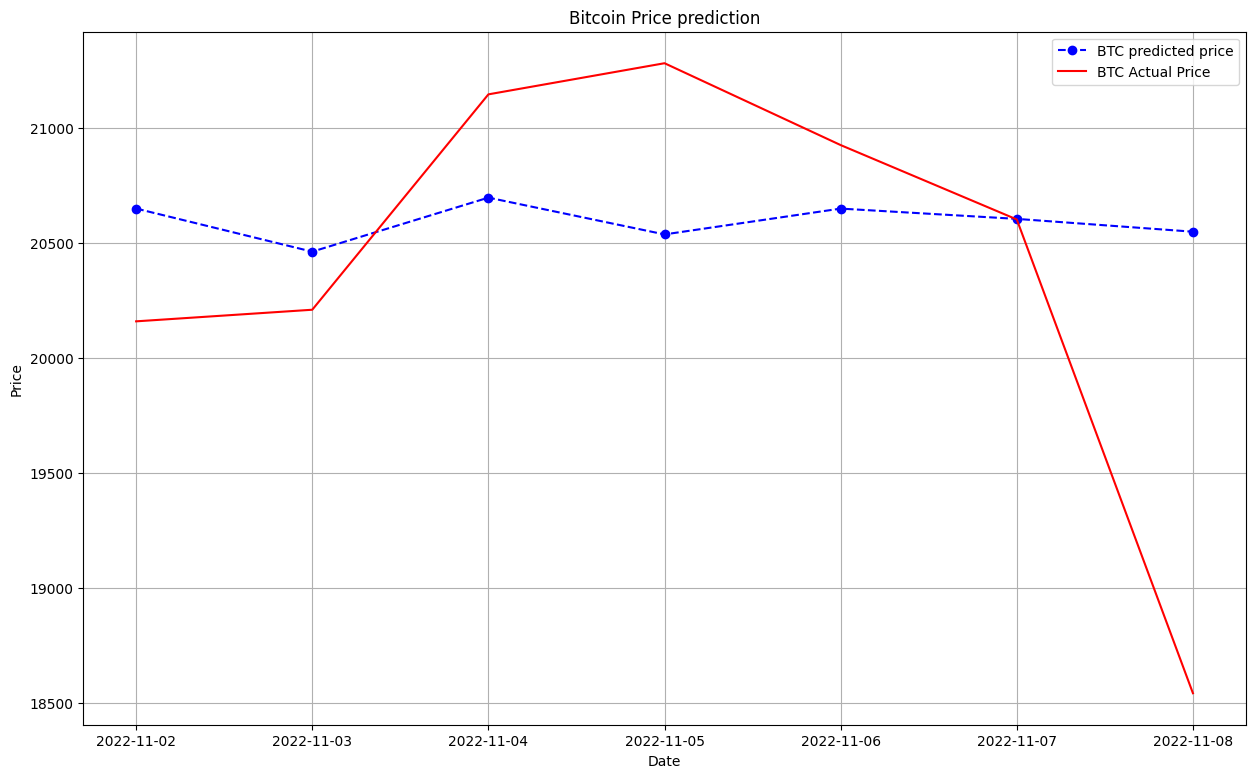

In [10]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = test.index

plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='BTC predicted price')
plt.plot(date_range, testing_data, color ='red', label='BTC Actual Price')

plt.title('Bitcoin Price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()